In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
from skimage.metrics import structural_similarity
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid
import glob
from matplotlib.image import imread
from math import floor
from numpy import ones
from numpy import expand_dims
from numpy import log
from numpy import mean
from numpy import std
from numpy import exp
from numpy.random import shuffle
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets import cifar10
from skimage.transform import resize
from numpy import asarray

In [81]:
# load
images = glob.glob('./lfi_project_imgs/1/*.PNG')

resized_images = []

for img in images:
    img = cv2.imread(img)
    if (256,256) != img.shape:
        img = cv2.resize(img,(int(256),int(256)))   
    resized_images.append(img)

images

['./lfi_project_imgs/1\\1_base.PNG',
 './lfi_project_imgs/1\\2_banyan.PNG',
 './lfi_project_imgs/1\\3_wo_pine.PNG',
 './lfi_project_imgs/1\\4_wo_fantasy.PNG',
 './lfi_project_imgs/1\\5_winter.PNG']

In [82]:
def get_ssim_score(image1, image2):
    # Convert the images to grayscale
    image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    ssim = np.round(structural_similarity(image1_gray, image2_gray), 2)
    return ssim

In [83]:
def get_metric_matrix(images, metric):
    n_images = len(images)
    metric_matrix = np.zeros((n_images, n_images))

    for i in np.arange(n_images):
        for j in np.arange(n_images):
            if metric == 'SSIM':
                res = get_ssim_score(images[i], images[j])
            metric_matrix[i, j] = res
    return metric_matrix

metric = 'SSIM'

if metric == 'SSIM':
    metric_min_value = 0
    metric_max_value = 1
    
# Calculate the SSIM matrix
metric_matrix = get_metric_matrix(resized_images, metric)

metric_matrix

array([[1.  , 0.33, 0.41, 0.43, 0.42],
       [0.33, 1.  , 0.24, 0.28, 0.28],
       [0.41, 0.24, 1.  , 0.36, 0.34],
       [0.43, 0.28, 0.36, 1.  , 0.37],
       [0.42, 0.28, 0.34, 0.37, 1.  ]])

In [84]:
images_name = []
for i in images:
    images_name.append(i[21:])

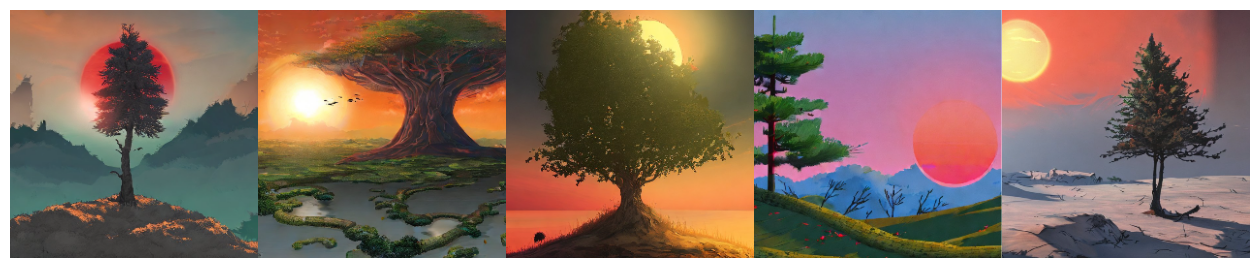

In [85]:
def plot_image_line(images, direction='h'):
    n_images = len(images)
    if direction == 'h':
        nrows = 1
        ncols = n_images
    elif direction == 'v':
        nrows = n_images
        ncols = 1
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16))
    plt.subplots_adjust(hspace=0, wspace=0)

    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
            ax.axis('off')

    plt.show()

plot_image_line(resized_images, 'h')

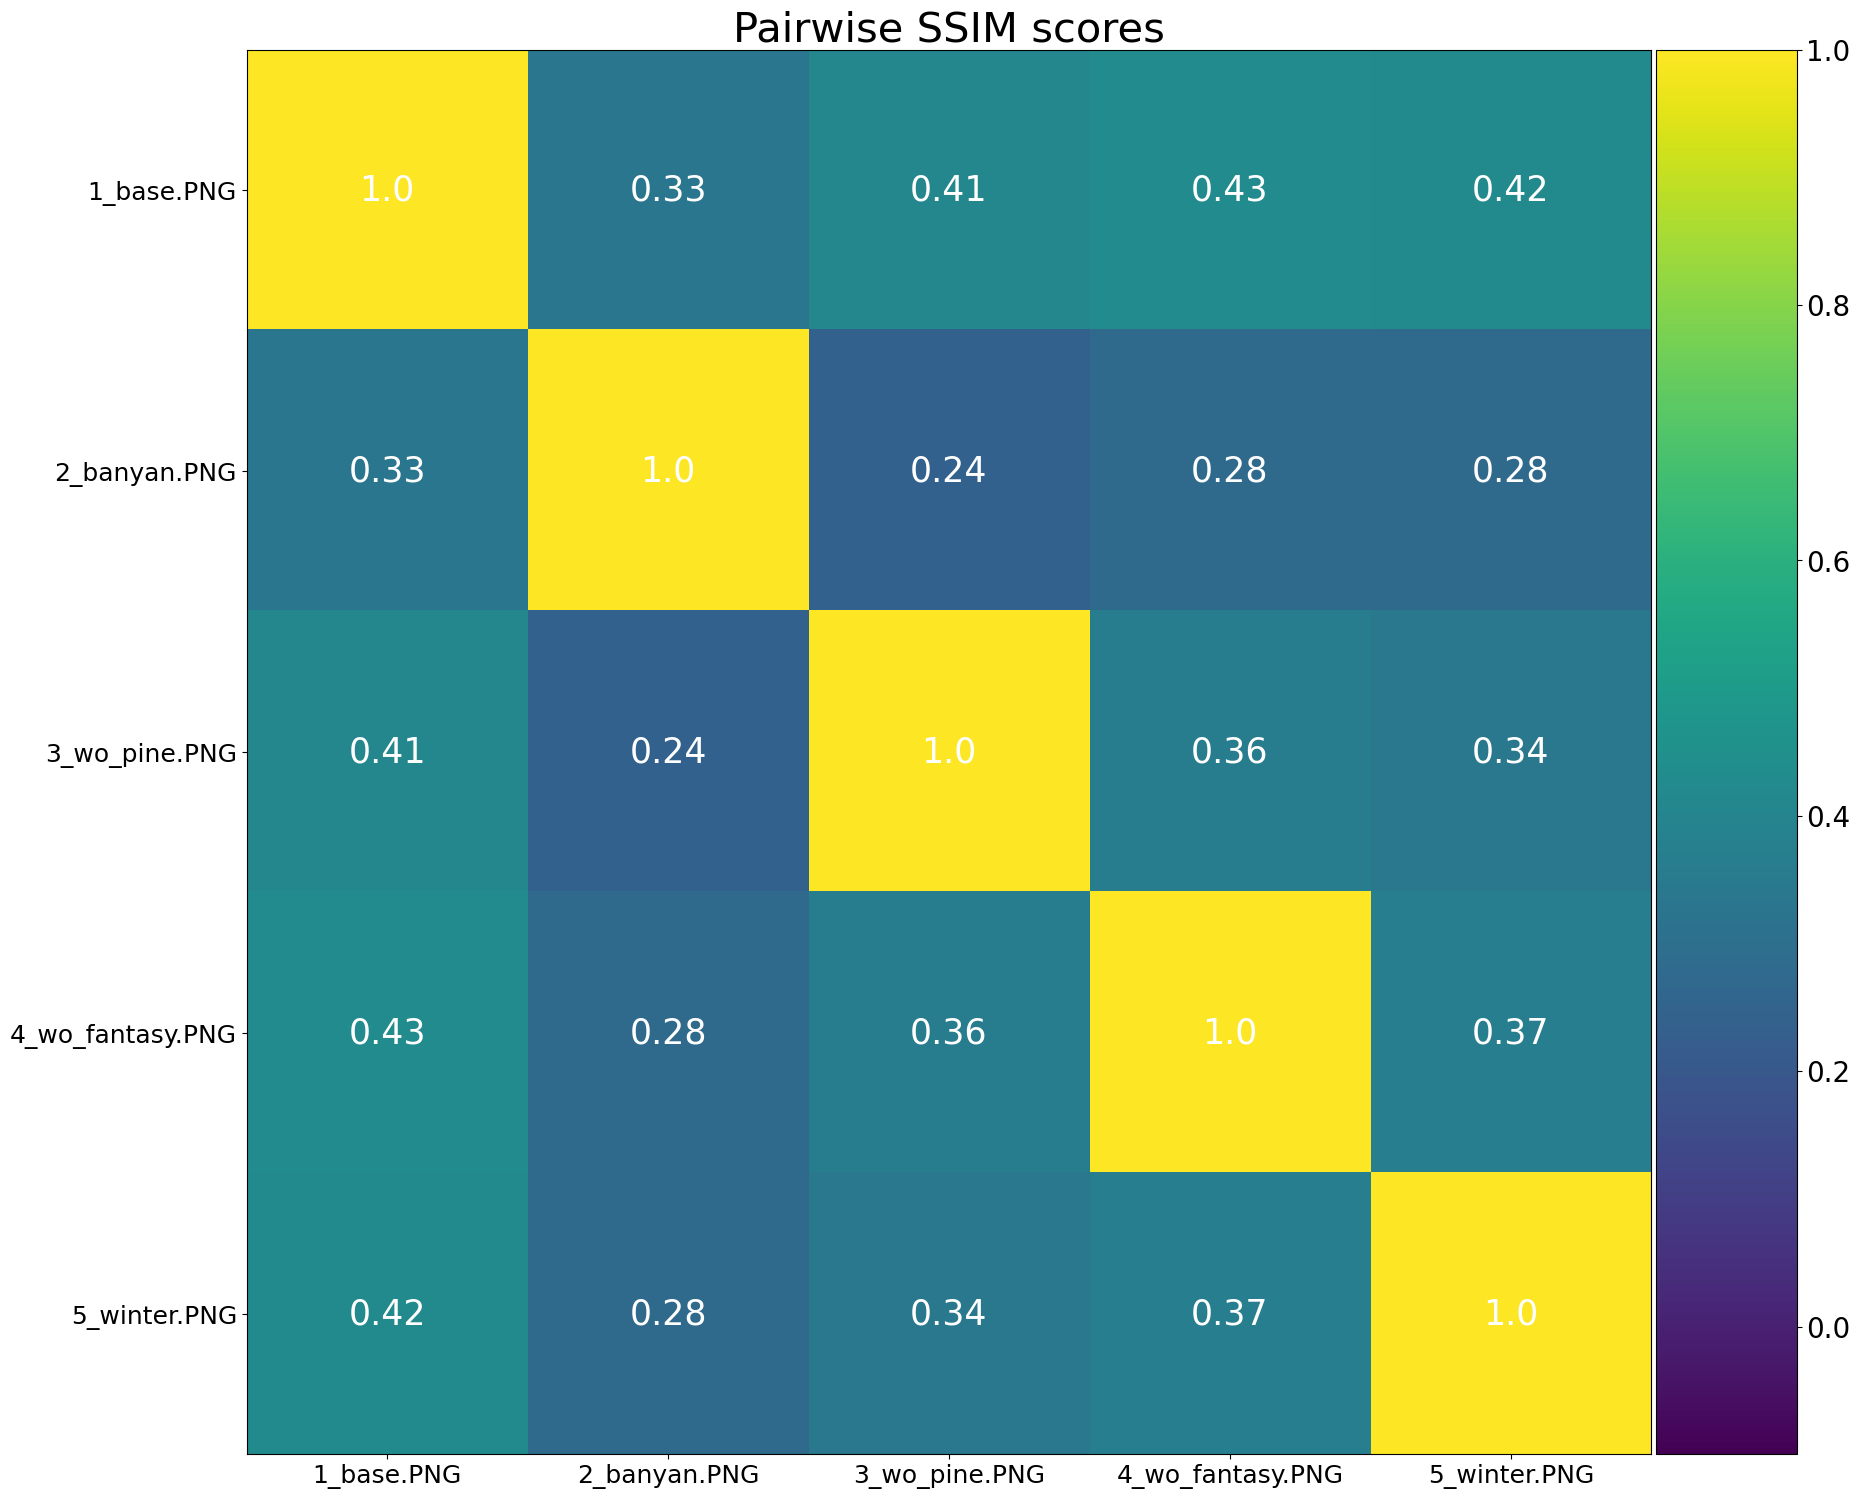

In [86]:
fig = plt.figure(figsize=(20, 20))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 1),
                 direction='row', axes_pad=0.05,
                 label_mode='1', share_all=False,
                 cbar_location='right', cbar_mode='single',
                 cbar_size='10%', cbar_pad=0.05)

ax = grid[0]
ax.set_title(f'Pairwise {metric} scores', fontsize=30)
ax.tick_params(axis='both', direction='out', labelsize=18)
im = ax.imshow(metric_matrix, interpolation='nearest', vmax=metric_min_value, vmin=metric_max_value)
ax.cax.colorbar(im)

ax.cax.tick_params(labelsize=20)
ax.set_xticks(np.arange(metric_matrix.shape[1]))
ax.set_xticklabels(images_name)
ax.set_yticks(np.arange(metric_matrix.shape[0]))
ax.set_yticklabels(images_name)

ax.grid(False)

for i in range(len(images)):
    for j in range(len(images)):
        text = ax.text(j, i, metric_matrix[i, j],
                       ha="center", va="center", color="w", size=25)

plt.show()

In [87]:
# def scale_images(images, new_shape):
#     images_list = list()
#     for image in images:
#         # resize with nearest neighbor interpolation
#         new_image = resize(image, new_shape, 0)
#         # store
#         images_list.append(new_image)
#     return asarray(images_list)

# def calculate_conditional_probabilities_entropy(images, n_split=10, eps=1E-16):
#     # load inception v3 model
#     model = InceptionV3()
#     # enumerate splits of images/predictions
#     scores = list()
#     # convert from uint8 to float32
#     images = images.astype('float32')
#     # scale images to the required size
#     images = scale_images(images, (299,299,3))
#     # pre-process images, scale to [-1,1]
#     images = preprocess_input(images)
#     # predict p(y|x)
#     p_yx = model.predict(images)

#     # calculate entropy
#     entropy = -1 * (p_yx * (log(p_yx + eps))).sum()
#     print("Entropy for dataset:")
#     print(entropy)
#     return entropy

In [88]:
# entropy = calculate_conditional_probabilities_entropy(np.array(resized_images))
# print('score', entropy)

In [89]:
# load
images = glob.glob('./lfi_project_imgs/2/*.jpg')

resized_images = []

for img in images:
    img = cv2.imread(img)
    if (256,256) != img.shape:
        img = cv2.resize(img,(int(256),int(256)))   
    resized_images.append(img)

images

['./lfi_project_imgs/2\\1_base.jpg',
 './lfi_project_imgs/2\\2_banyan_tree.jpg',
 './lfi_project_imgs/2\\3_lessfantasy.jpg',
 './lfi_project_imgs/2\\4_lesspine.jpg',
 './lfi_project_imgs/2\\5_winter.jpg']

In [90]:
images_name = []
for i in images:
    images_name.append(i[21:])
    
images_name

['1_base.jpg',
 '2_banyan_tree.jpg',
 '3_lessfantasy.jpg',
 '4_lesspine.jpg',
 '5_winter.jpg']

In [92]:
metric = 'SSIM'

if metric == 'SSIM':
    metric_min_value = 0
    metric_max_value = 1
    
# Calculate the SSIM matrix
metric_matrix = get_metric_matrix(resized_images, metric)

metric_matrix

array([[1.  , 0.73, 0.75, 0.72, 0.83],
       [0.73, 1.  , 0.64, 0.64, 0.67],
       [0.75, 0.64, 1.  , 0.65, 0.69],
       [0.72, 0.64, 0.65, 1.  , 0.66],
       [0.83, 0.67, 0.69, 0.66, 1.  ]])

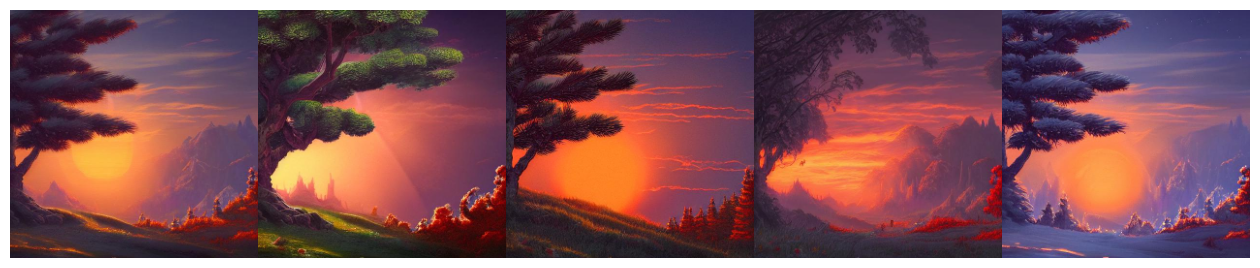

In [93]:
plot_image_line(resized_images, 'h')

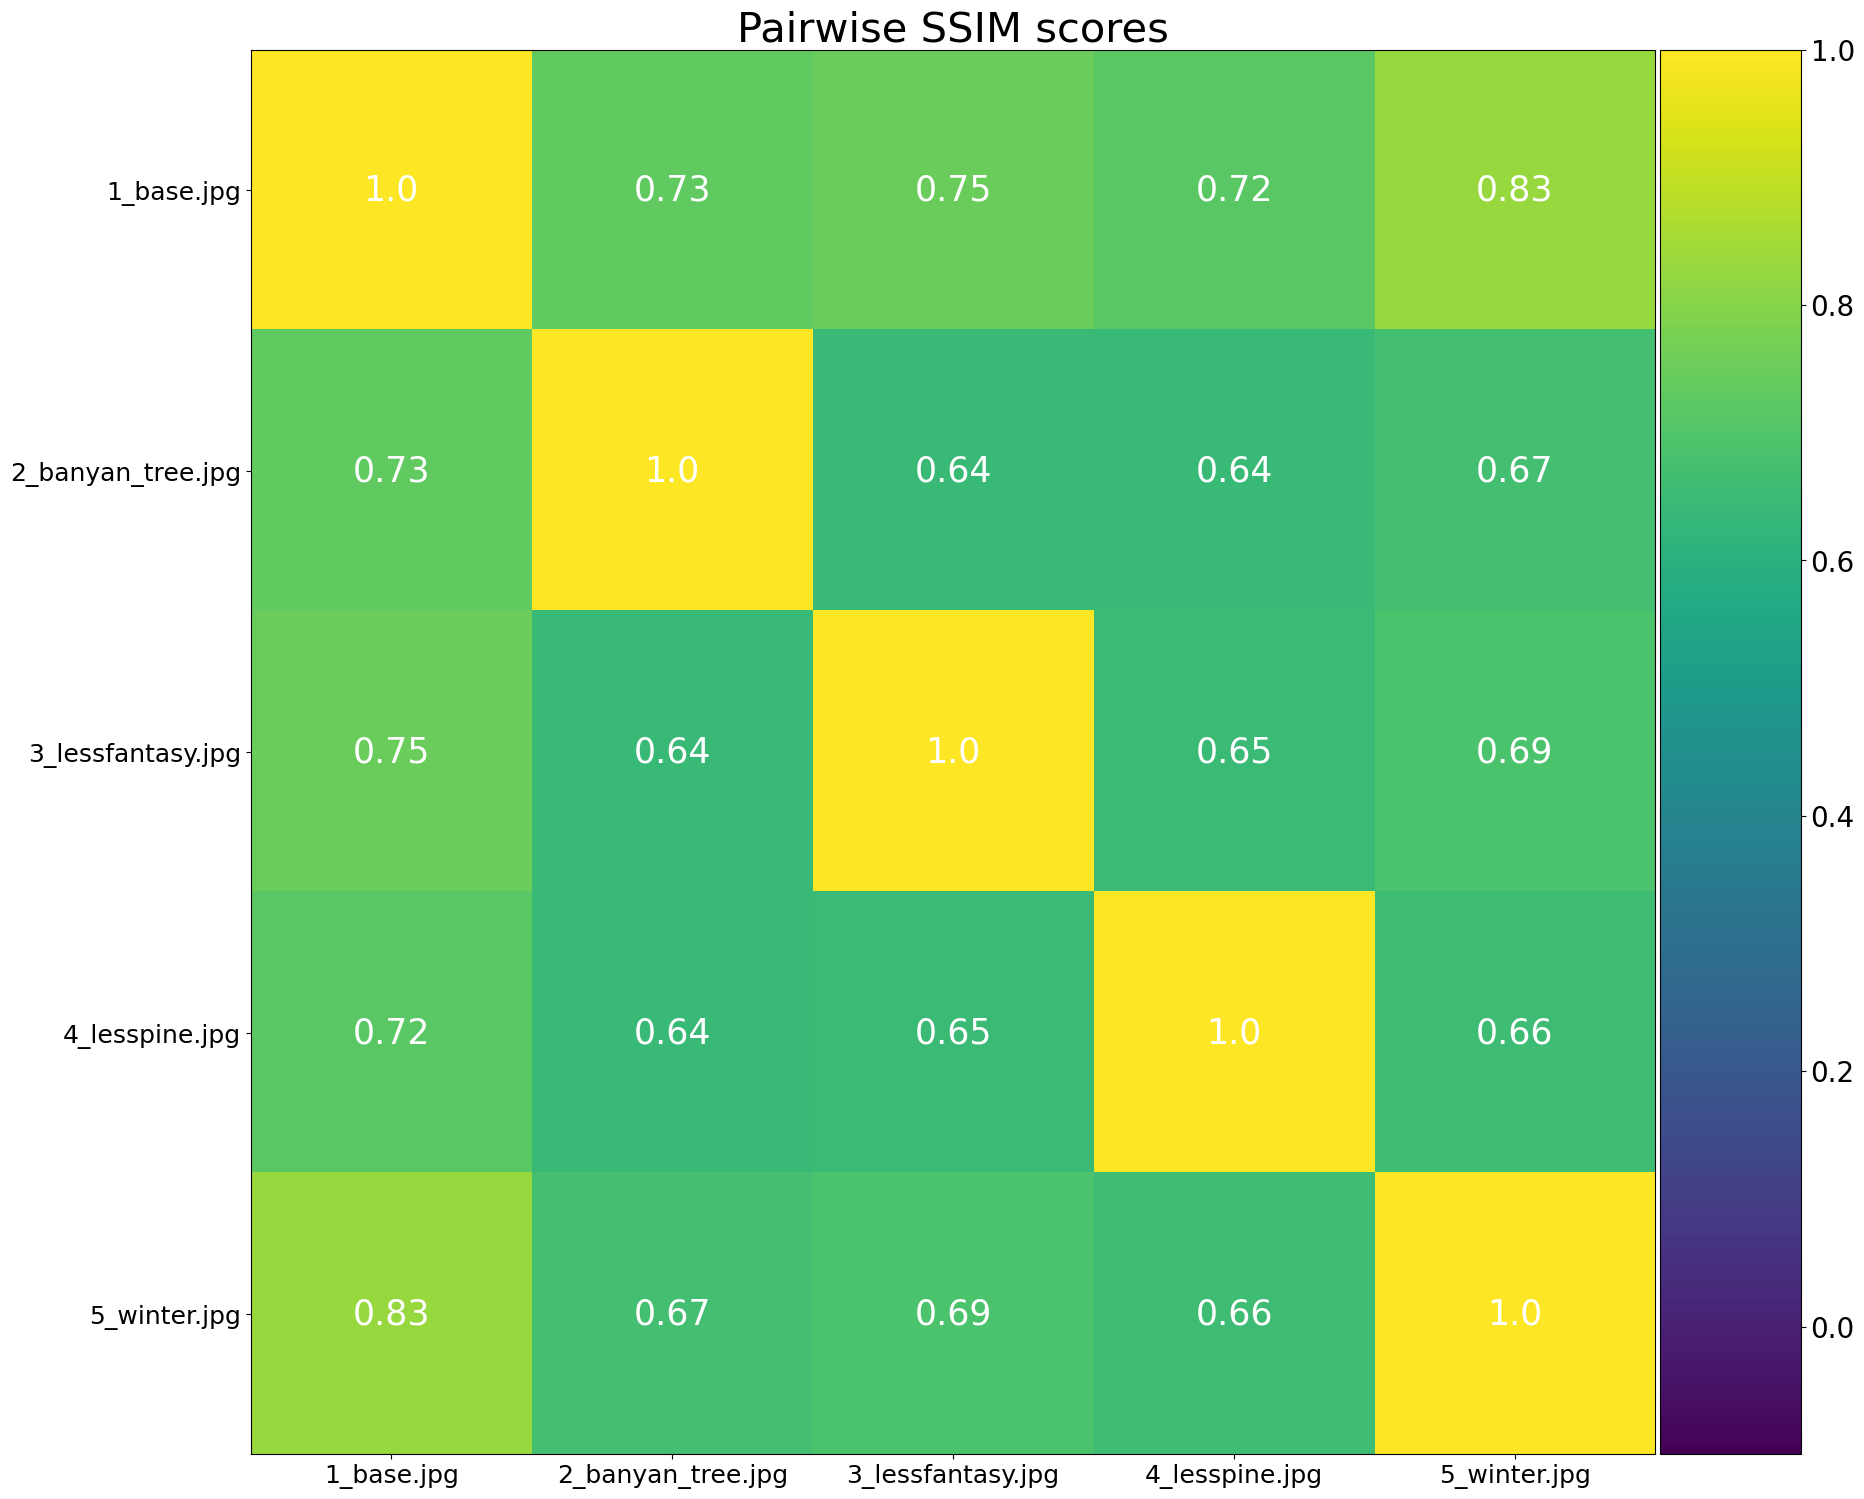

In [94]:
fig = plt.figure(figsize=(20, 20))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 1),
                 direction='row', axes_pad=0.05,
                 label_mode='1', share_all=False,
                 cbar_location='right', cbar_mode='single',
                 cbar_size='10%', cbar_pad=0.05)

ax = grid[0]
ax.set_title(f'Pairwise {metric} scores', fontsize=30)
ax.tick_params(axis='both', direction='out', labelsize=18)
im = ax.imshow(metric_matrix, interpolation='nearest', vmax=metric_min_value, vmin=metric_max_value)
ax.cax.colorbar(im)

ax.cax.tick_params(labelsize=20)
ax.set_xticks(np.arange(metric_matrix.shape[1]))
ax.set_xticklabels(images_name)
ax.set_yticks(np.arange(metric_matrix.shape[0]))
ax.set_yticklabels(images_name)

ax.grid(False)

for i in range(len(images)):
    for j in range(len(images)):
        text = ax.text(j, i, metric_matrix[i, j],
                       ha="center", va="center", color="w", size=25)

plt.show()

In [95]:
# load
images = glob.glob('./lfi_project_imgs/3/*.jpg')

resized_images = []

for img in images:
    img = cv2.imread(img)
    if (256,256) != img.shape:
        img = cv2.resize(img,(int(256),int(256)))   
    resized_images.append(img)

images

['./lfi_project_imgs/3\\1_base.jpg',
 './lfi_project_imgs/3\\2_girl.jpg',
 './lfi_project_imgs/3\\3_man.jpg',
 './lfi_project_imgs/3\\4_dry.jpg',
 './lfi_project_imgs/3\\5_watercolor.jpg']

In [96]:
images_name = []
for i in images:
    images_name.append(i[21:])
    
images_name

['1_base.jpg', '2_girl.jpg', '3_man.jpg', '4_dry.jpg', '5_watercolor.jpg']

In [97]:
metric = 'SSIM'

if metric == 'SSIM':
    metric_min_value = 0
    metric_max_value = 1
    
# Calculate the SSIM matrix
metric_matrix = get_metric_matrix(resized_images, metric)

metric_matrix

array([[1.  , 0.89, 0.88, 0.91, 0.57],
       [0.89, 1.  , 0.85, 0.87, 0.63],
       [0.88, 0.85, 1.  , 0.86, 0.59],
       [0.91, 0.87, 0.86, 1.  , 0.61],
       [0.57, 0.63, 0.59, 0.61, 1.  ]])

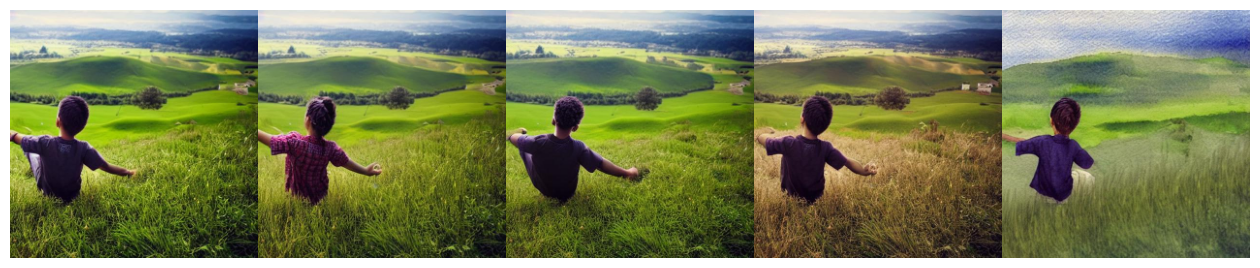

In [98]:
plot_image_line(resized_images, 'h')

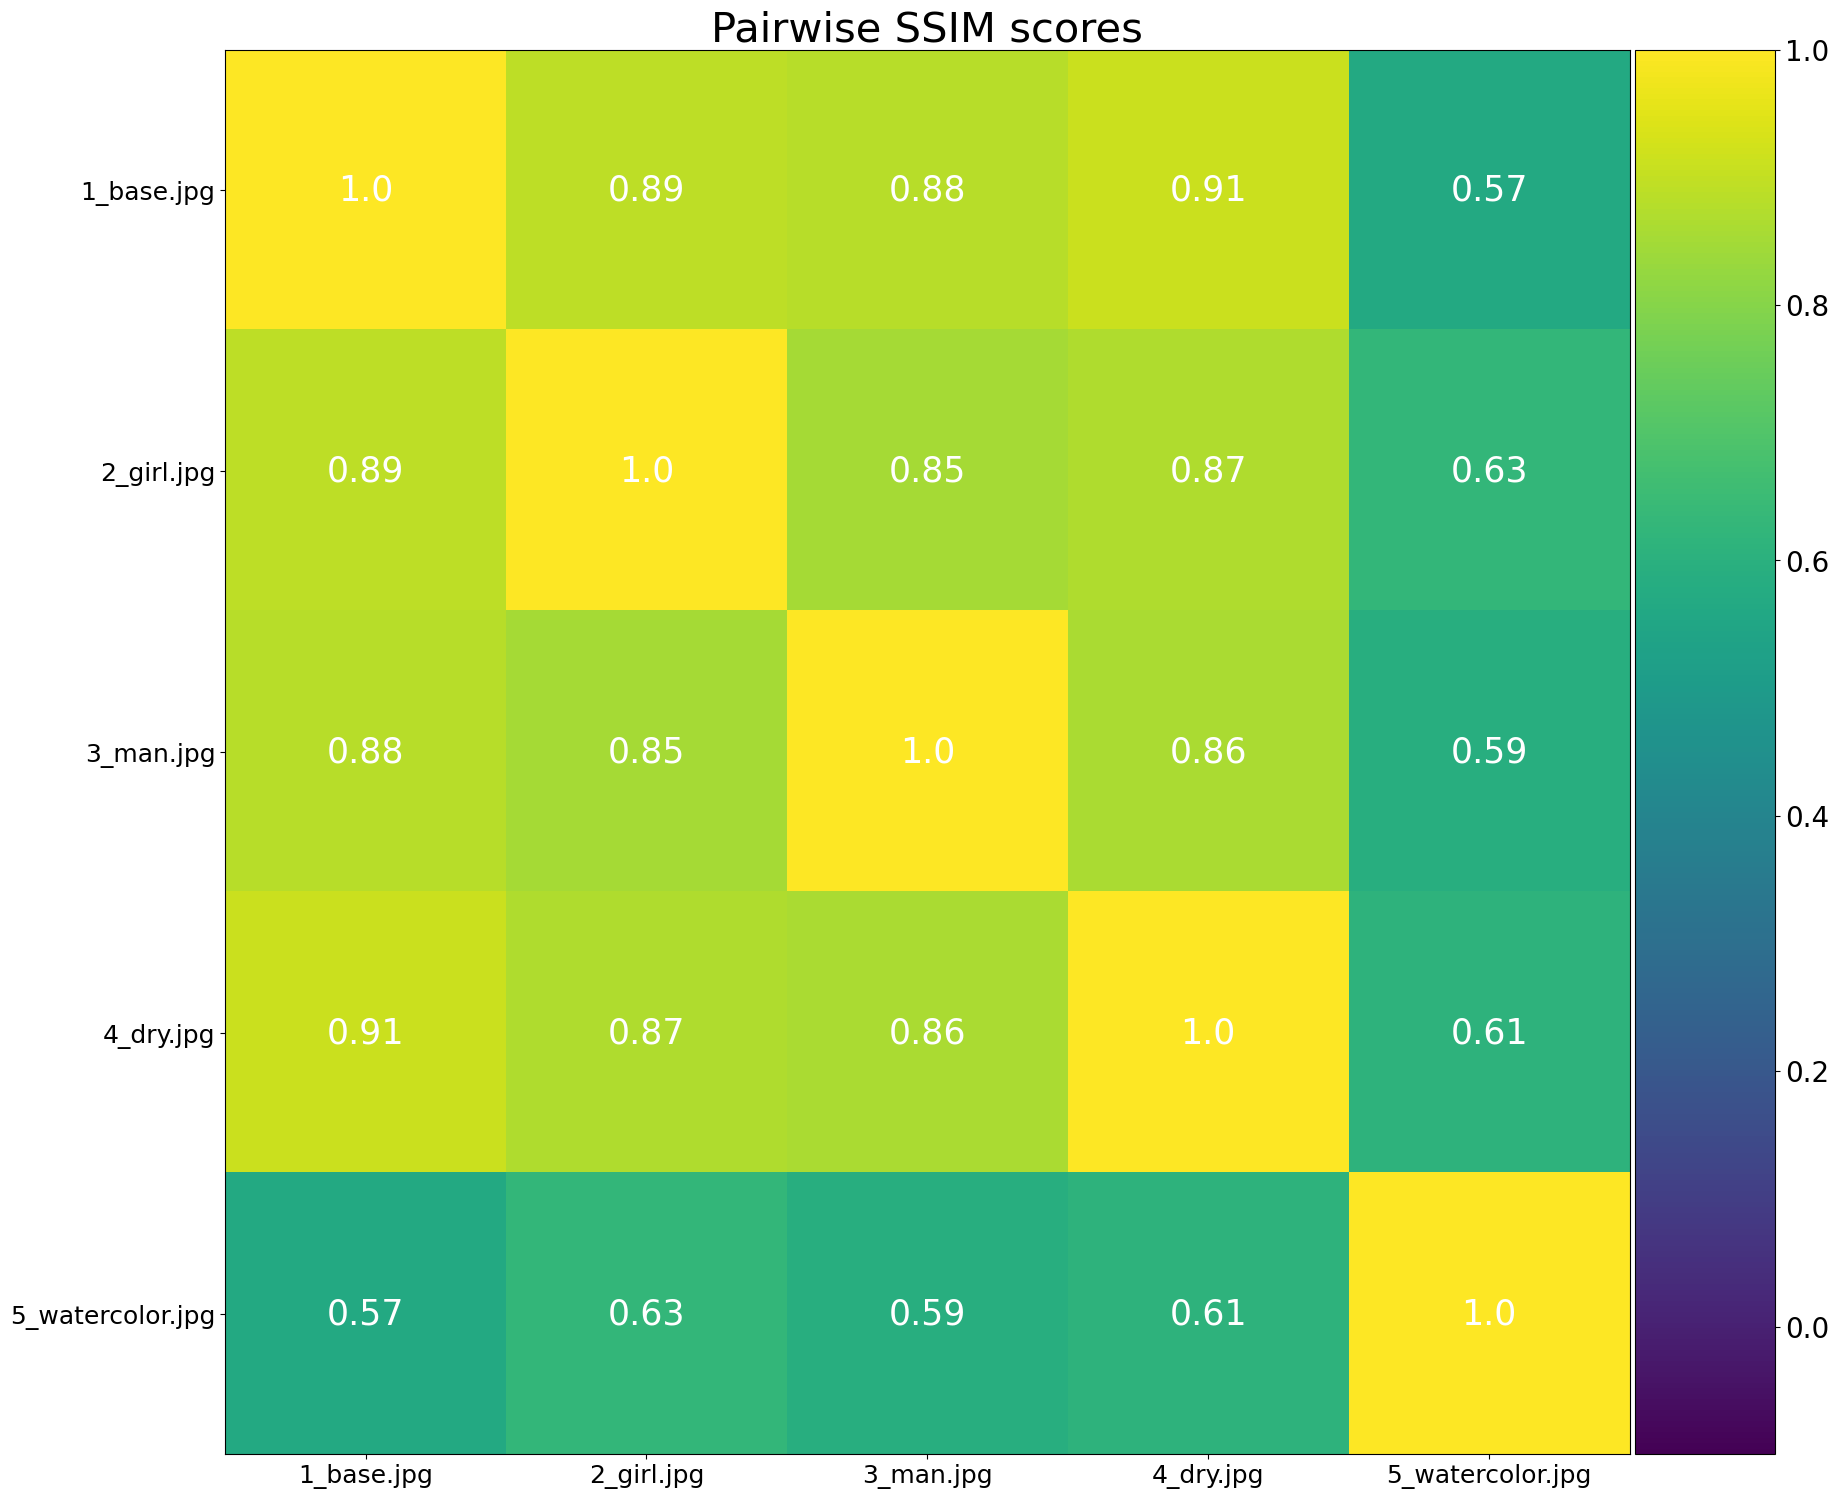

In [99]:
fig = plt.figure(figsize=(20, 20))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 1),
                 direction='row', axes_pad=0.05,
                 label_mode='1', share_all=False,
                 cbar_location='right', cbar_mode='single',
                 cbar_size='10%', cbar_pad=0.05)

ax = grid[0]
ax.set_title(f'Pairwise {metric} scores', fontsize=30)
ax.tick_params(axis='both', direction='out', labelsize=18)
im = ax.imshow(metric_matrix, interpolation='nearest', vmax=metric_min_value, vmin=metric_max_value)
ax.cax.colorbar(im)

ax.cax.tick_params(labelsize=20)
ax.set_xticks(np.arange(metric_matrix.shape[1]))
ax.set_xticklabels(images_name)
ax.set_yticks(np.arange(metric_matrix.shape[0]))
ax.set_yticklabels(images_name)

ax.grid(False)

for i in range(len(images)):
    for j in range(len(images)):
        text = ax.text(j, i, metric_matrix[i, j],
                       ha="center", va="center", color="w", size=25)

plt.show()